In [114]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacymoji import Emoji

# import data and read to df
csv = "../Output/all_data.csv"
df = pd.read_csv(csv, low_memory=False)

df.head()

,tweet_id,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id
0,914580356430536707,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760
1,914621840496189440,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760
2,914623490375979008,-0.1531,0.126,0.198,0.676,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760
3,914639143690555392,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760
4,914312219952861184,0.6399,0.413,0.000,0.587,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760


In [6]:
# group the dataframe by account

account_df = df[["author", "Compound_Score", "Positive_Score", "Negative_Score", "Neutral_Score", "updates", "following", "followers"]]
account_type_ref = df[["author", "account_type"]].drop_duplicates()
account_df = account_df.groupby(df["author"]).mean()
account_df = account_df.merge(account_type_ref, left_index=True, right_on='author').set_index('author')

account_df.head(11)

,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,updates,following,followers,account_type
author,,,,,,,,
10_GOP,0.078718,0.131511,0.089804,0.778685,176.500000,985.018817,7044.306452,Right
1D_NICOLE_,0.177359,0.193545,0.069000,0.737455,373.500000,58.500000,51.477273,Koch
1ERIK_LEE,-0.549850,0.000000,0.214000,0.786000,333.000000,239.000000,74.000000,Right
2NDHALFONION,0.439200,0.186000,0.000000,0.814000,10.000000,22.000000,1.000000,Right
4EVER_SUSAN,0.042470,0.133794,0.104810,0.761413,37.047619,75.650794,57.777778,Right
4MYSQUAD,-0.055819,0.103039,0.110443,0.786312,2008.561763,2271.423753,1159.036830,Left
666STEVEROGERS,0.021032,0.118129,0.095986,0.785899,85.244604,116.791367,7.741007,?
AAASSSSSHHH,-0.064954,0.124042,0.155423,0.720563,351.450704,27.633803,40.225352,Koch
AANTIRACIST,0.008194,0.093449,0.086481,0.820066,1378.186901,904.408147,748.006390,Left


In [56]:
# import and create a default dictionary to store words as it finds them from function below
from collections import defaultdict
word_counts = defaultdict(int) #template for simpler function code

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# make separate dfs for left and right trolls
right_troll_df = df[df["account_category"] == "RightTroll"]
left_troll_df = df[df["account_category"] == "LeftTroll"]

# function to run NER 
def getEntities(tweet):
    output = nlp(tweet)
    ents = output.ents
    return_list = []
    for ent in ents:
        return_list.append(ent.text.lower())
        word_counts[ent.text.lower()] += 1
    return return_list

# run on a random sample of Left and Right Trolls
Right = right_troll_df['content'].sample(n=25000).apply(getEntities)
Right_Counts = word_counts #dict for right measurements
del word_counts 
word_counts = defaultdict(int)
Left = left_troll_df['content'].sample(n=25000).apply(getEntities)
Left_Counts = word_counts #dict for left measurements
del word_counts

In [57]:
#get the value from the key-value dictionary
def getSecond(x):
    return x[1]

#Get Top Entities from the Right Trolls df and sort by most instances to least
top = 50
sorted_entities = sorted(Right_Counts.items(), key=getSecond, reverse=True)
for ent in sorted_entities[0:top]:
    print("{} - {}".format(ent[1], ent[0]))


1116 - rt
801 -  
757 - #
652 - obama
594 - hillary
507 - trump
421 - maga
402 - america
382 - cnn
291 - us
263 - one
241 - american
239 - gop
238 - russia
218 - democrats
205 - clinton
203 - u.s.
201 - today
194 - fbi
187 - 🇺
184 - 2
183 - americans
182 - donald trump
180 - first
177 - fakenews
167 - democrat
158 - muslim
157 - congress
157 - dems
157 - hillary clinton
145 - lol
144 - pjnet
137 - antifa
133 - nfl
131 - 4
127 - iran
127 - dem
126 - north korea
126 - charlottesville
115 - dnc
115 - muslims
114 - two
112 - ️
108 - california
107 - republicans
105 - #mar
102 - msm
101 - texas
95 - islam
95 - israel


In [59]:
#Get Top Entities from the Left Trolls df and sort by most instances to least
top = 50
sorted_entities = sorted(Left_Counts.items(), key=getSecond, reverse=True)
for ent in sorted_entities[0:top]:
    print("{} - {}".format(ent[1], ent[0]))


733 -  
621 - #
481 - blacklivesmatter
326 - trump
314 - today
299 - one
269 - first
231 - 2
216 - america
215 - us
187 - rt
166 - ️
158 - obama
137 - chicago
136 - 1
135 - 4
128 - 2016
122 - donald trump
122 - gop
117 - 3
115 - @youtube
112 - russia
107 - 5
105 - tonight
105 - trump's
105 - american
103 - two
95 - black
90 - 2017
90 - u.s.
82 - 10
75 - americans
74 - blm
72 - clinton
68 - staywoke
64 - hillary
64 - republicans
64 - blackhistorymonth
63 - dagr8fm
60 - 6
60 - texas
60 - god
58 - @realdonaldtrump
57 - tomorrow
57 - muslim
56 - rapstationradio
56 - baltimore
55 - \|
55 - fbi
53 - @josephjett


# Most common words 
Here are some of the most common words between left and right trolls. The search_terms list below will include different spellings of these words or words that are very closely associated, like if "trump" was a most used word, "donald" would mean the same thing and be added to this list. I will search all of these words with a function to find content that "contains" certain words so that I can see a comprehensive overview of how many tweets mentioned the subjects, and not just the most used word of the subjects below.

1. Trump
2. BlackLivesMatter
3. Hillary
4. Wall
5. Obama
6. America
7. Republican
8. Democrat
9. MAGA
10. Islam
11. Fake news
12. Russia


In [ ]:
# make a df for the search terms so you can store the frequency that they appear in a search 
    # and the avg sentiment score that the right and the left associates with them
common_words_scored = ["Subject", "Right_Frequency", "Left_Frequency", "Right_Sentiment", "Left_Sentiment"]

In [93]:
search_terms = {"Trump": ["Trump", "Donald", "DJT", "trump's", "realdonaldtrump"],
                "BlackLivesMatter": ["BlackLivesMatter", "blacklives", "black", "blm", "get woke", "blackhistorymonth", "african american"],
                "Hillary": ["Hillary", "Clinton"],
                "Wall": ["Wall", "build", "border"],
                "Obama": ["Obama", "obamacare", "barack"],
                "America": ["America", "USA", "united states", "merca", "u.s.", "American"],
                "Republican": ["Republican", "gop", "conservative", "right wing"],
                "Democrat": ["Democrat", "dem", "libs", "liberal", "left wing", "dnc"],
                "Maga": ["Maga", "make america great again"],
                "Islam": ["Islam", "muslim", "iran", "iraq", "israel", "middle east","isis"],
                "Fakenews": ["Fake news","fakenews","fox","cnn","msnbc","WaPo","Washington Post","NYT","New York Times","HuffPost","Huffington","Yahoo"],
                "Russia": ["Russia"]
               }

In [95]:
final_df = defaultdict(list)
right_troll_df['content'] = right_troll_df['content'].str.lower()
left_troll_df['content'] = left_troll_df['content'].str.lower()

# functions to find the frequency of common words and their avg sentiment from left and right account

def calculateRightFrequency(termsList):
    related_rows = right_troll_df[right_troll_df['content'].str.contains("|".join(termsList))]
    return len(related_rows)

def calculateLeftFrequency(termsList):
    related_rows = left_troll_df[left_troll_df['content'].str.contains("|".join(termsList))]
    return len(related_rows)

def calculateRightSentiment(termsList):
    related_rows = right_troll_df[right_troll_df['content'].str.contains("|".join(termsList))]
    return pd.to_numeric(related_rows["Compound_Score"]).mean()

def calculateLeftSentiment(termsList):
    related_rows = left_troll_df[left_troll_df['content'].str.contains("|".join(termsList))]
    return pd.to_numeric(related_rows["Compound_Score"]).mean()

def calculateRightStdDev(termsList):
    related_rows = right_troll_df[right_troll_df['content'].str.contains("|".join(termsList))]
    return pd.to_numeric(related_rows["Compound_Score"]).std()

def calculateLeftStdDev(termsList):
    related_rows = left_troll_df[left_troll_df['content'].str.contains("|".join(termsList))]
    return pd.to_numeric(related_rows["Compound_Score"]).std()

def calculateRightUpdates(termsList):
    related_rows = right_troll_df[right_troll_df['content'].str.contains("|".join(termsList))]
    return pd.to_numeric(related_rows["updates"]).mean()

for term in search_terms:
    search_terms[term] = [ t.lower() for t in search_terms[term] ]
    final_df['Topic'].append(term)
    final_df["Right_Frequency"].append(calculateRightFrequency(search_terms[term]))
    final_df["Left_Frequency"].append(calculateLeftFrequency(search_terms[term]))
    final_df["Right_Sentiment"].append(calculateRightSentiment(search_terms[term]))
    final_df["Left_Sentiment"].append(calculateLeftSentiment(search_terms[term]))
    final_df["Right_Sentiment_Std"].append(calculateRightStdDev(search_terms[term]))
    final_df["Left_Sentiment_Std"].append(calculateRightStdDev(search_terms[term]))
    final_df["Right_Updates"].append(calculateRightUpdates(search_terms[term]))

final_df = pd.DataFrame(final_df)
final_df.head(12)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Topic,Right_Frequency,Left_Frequency,Right_Sentiment,Left_Sentiment,Right_Sentiment_Std,Left_Sentiment_Std,Right_Updates
0,Trump,139455,28178,-0.035907,-0.069399,0.456759,0.456759,10070.070740
1,BlackLivesMatter,14513,53130,-0.145995,-0.018735,0.454990,0.454990,8034.139392
2,Hillary,52230,5311,-0.085268,-0.013561,0.422539,0.422539,9004.150029
3,Wall,10403,3785,-0.049571,0.063941,0.430326,0.430326,12549.104681
4,Obama,45185,5938,-0.107213,-0.016021,0.434051,0.434051,7752.373819
5,America,135688,56162,-0.041184,0.004665,0.461271,0.461271,10244.696281
6,Republican,28177,6593,-0.034941,-0.055502,0.433535,0.433535,8166.365546
7,Democrat,59551,8762,-0.159778,-0.040120,0.446818,0.446818,9717.473796
8,Maga,18707,2317,0.045751,0.126126,0.453496,0.453496,18903.959641
9,Islam,42693,6939,-0.186188,-0.184455,0.447204,0.447204,6979.531492


In [96]:
#look at tweets to see how the sentiment scores did on sarcasm
(right_troll_df[right_troll_df["content"].str.contains("thanks obama")][["content","Neutral_Score","Negative_Score","Positive_Score","Compound_Score"]]).head(5)

,content,Neutral_Score,Negative_Score,Positive_Score,Compound_Score
35975,rt richardstiller4: polnewsforever ten_gop tha...,0.49,0.307,0.203,-0.3595
43986,new post: thanks obama! illegal alien satantis...,0.519,0.34600000000000003,0.135,-0.7712
80656,"it's cheap and easy to say, ""thanks obama!"" th...",0.757,0.0,0.243,0.7263
93460,does it seem like everyone in the world wants ...,0.693,0.129,0.17800000000000002,0.128
165041,isis celebrates victory in ramadi ➠ thanks oba...,0.488,0.19,0.322,0.4019


TypeError: unhashable type: 'numpy.ndarray'

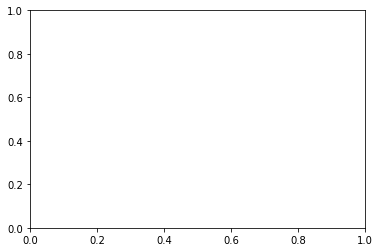

In [116]:
# make scatter plot
right_sentiment = pd.DataFrame(final_df["Right_Sentiment"])
left_sentiment = pd.DataFrame(final_df["Left_Sentiment"])
topic = pd.DataFrame(final_df["Topic"])
x_axis = np.arange(-1, 1, .1)
y_axis_right =  pd.DataFrame(final_df["Right_Updates"])
# y_axis_left = 


# Build the scatter plots for each city type
# ax1 = topic.plot(kind='scatter',x=x_axis, y="1",
#                        color="red", s=final_df["Right_Sentiment"], label = "Right Sentiment", 
#                        alpha = 0.5, edgecolor = "black", linewidths = 1.5)    
# ax2 = topic.plot(kind='scatter', x=x_axis, y="0", 
#                           color="blue",s=final_df["Left_Sentiment"]*2, label = "Left Sentiment", 
#                           alpha = 0.5, edgecolor = "black", linewidths = 1.5, ax=ax1)    

plt.scatter(x_axis, final_df, marker="o", facecolors="red", edgecolors="black",
            s=right_sentiment, alpha=0.75)

# Incorporate the other graph properties
plt.title("Sentiment of Most Used Words")
plt.xlabel("VADER Score")
# plt.ylabel("tbd")

# Create a legend
plt.legend(title = 'TBD')
plt.grid(True)

# text label about the circle size
textstr = "Note: \n Note Here."
plt.text(42,35,textstr, fontsize=11)

plt.show()
# plt.savefig("Images/sentiment_leftandright.png")

In [ ]:
# make bars to connect the dots